In [1]:
import matplotlib
import netCDF4 as nc
#matplotlib.use('GTKAgg') 
import numpy as np
from numpy import ma
import os
import argparse
import cartopy
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import matplotlib.colors as colors
from matplotlib.colors import Normalize
import cartopy.crs as ccrs
import sys
import re
from cartopy.feature import LAND

In [2]:
# ============================ plot utility ========================================
def add_land_features(ax,cfeature_lst):
# get isf groiunding line, ice shelf front and coastline
    for ifeat,cfeat in enumerate(cfeature_lst):
        if cfeat=='isf':
            #feature = cartopy.feature.NaturalEarthFeature('physical', 'antarctic_ice_shelves_polys', '50m',facecolor='0.75',edgecolor='k') # global plot
            feature = cartopy.feature.NaturalEarthFeature('physical', 'antarctic_ice_shelves_polys', '50m',facecolor='none',edgecolor='k')
        elif cfeat=='lakes':
            feature = cartopy.feature.NaturalEarthFeature('physical', 'lakes'                      , '50m',facecolor='none',edgecolor='k')
        elif cfeat=='coast':
            feature = cartopy.feature.NaturalEarthFeature('physical', 'coastline'                  , '50m',facecolor='0.75',edgecolor='k')
        elif cfeat=='land':
            feature = cartopy.feature.NaturalEarthFeature('physical', 'land'                       , '50m',facecolor='0.75',edgecolor='k')
        elif cfeat=='bathy_z1000':
            feature = cartopy.feature.NaturalEarthFeature('physical', 'bathymetry_J_1000'          , '10m',facecolor='none',edgecolor='k')
        elif cfeat=='bathy_z2000':
            feature = cartopy.feature.NaturalEarthFeature('physical', 'bathymetry_I_2000'          , '10m',facecolor='none',edgecolor='k')
        elif cfeat=='bathy_z3000':
            feature = cartopy.feature.NaturalEarthFeature('physical', 'bathymetry_H_3000'          , '10m',facecolor='none',edgecolor='k')
        else:
            print('feature unknown : '+cfeat)
            sys.exit(42)
        ax.add_feature(feature,linewidth=0.5)

class box(object):
    def __init__(self,corner,name):
        self.xmin=corner[0]-1
        self.xmax=corner[1]-1
        self.ymin=corner[2]-1
        self.ymax=corner[3]-1
        self.name=name

In [3]:
inputpath_open='/data/cdelaver/n42openc/'


/home/cburgard/.conda/envs/py38/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'rasterized'
  result = super().contour(*args, **kwargs)


Text(288.5, -70.29627227783203, 'ACC')

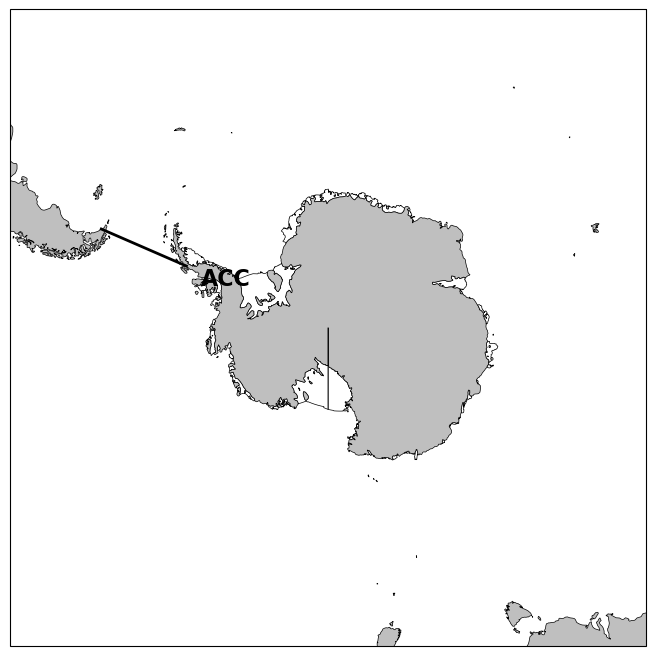

In [9]:
cfile=inputpath_open + 'n42openc_00910101_01001231_1Y_grid_T.nc'
ncid   = nc.Dataset(cfile)
#bathy = ncid.variables['bathy_metry'][:,0:-2,:].squeeze()
ncid   = nc.Dataset(cfile)
lon = ncid.variables['nav_lon'][0:-2,:]
lat = ncid.variables['nav_lat'][0:-2,:]
delta_lon=np.abs(np.diff(lon))
j_lst,i_lst=np.nonzero(delta_lon>180)
for idx in range(0,len(j_lst)):
    lon[j_lst[idx], i_lst[idx]+1:] += 360

#box_lst=[]
#box_lst.append(box([710,741,202,266],'AMU'))
#box_lst.append(box([891,938,204,258],'WWED'))
#box_lst.append(box([347,404,150,233],'WROSS'))
#box_lst.append(box([448,519,152,180],'EROSS'))
#box_lst.append(box([1025,1300,325,380],'WG'))
#box_lst.append(box([476,607 ,254,370],'RG'))
#box_lst.append(box([968,1020,159,190],'EWED'))

mask=np.zeros(shape=lon.shape)
for box in box_lst:
    mask[box.ymin:box.ymax,box.xmin:box.xmax] = 1.0

proj=ccrs.Stereographic(central_latitude=-90.0, central_longitude=0.0)
XY_lim=[-180, 180, -90, -45]
plt.figure(figsize=np.array([210, 210]) / 25.4)
ax=plt.subplot(1, 1, 1, projection=proj)
#ax=plt.subplot(1, 1, 1)
add_land_features(ax,['isf','lakes','land'])

#print(lon.shape, lat.shape, bathy.shape)
#ax.pcolormesh(lon,lat,bathy,cmap='Blues',vmin=0,vmax=7000,transform=ccrs.PlateCarree(),rasterized=True)

ax.contour(lon,lat,mask,levels=[0.99, 2.0],transform=ccrs.PlateCarree(),colors='k',rasterized=True,linewidths=2)
ax.set_extent(XY_lim, ccrs.PlateCarree())

ax.plot([lon[79,220], lon[106,220]],[lat[79,220], lat[106,220]],transform=ccrs.PlateCarree(),color='k',linewidth=2,rasterized=True)
ax.text(lon[79,220]-5,lat[79,220]-3,'ACC',transform=ccrs.PlateCarree(),color='k',fontweight='bold',fontsize=16)

In [ ]:
#box=box_lst[0]; ax.text(lon[box.ymin,box.xmin]-1, lat[box.ymin,box.xmin]-1,box.name,transform=ccrs.PlateCarree(),color='k',fontweight='bold',fontsize=16)
#box=box_lst[1]; ax.text(lon[box.ymin,box.xmin]-20, lat[box.ymin,box.xmin]+4,box.name,transform=ccrs.PlateCarree(),color='k',fontweight='bold',fontsize=16)
#box=box_lst[2]; ax.text(lon[box.ymin,box.xmin], lat[box.ymin,box.xmin]-1,box.name,transform=ccrs.PlateCarree(),color='k',fontweight='bold',fontsize=16)
#box=box_lst[3]; ax.text(lon[box.ymin,box.xmin]+45, lat[box.ymin,box.xmin]+3,box.name,transform=ccrs.PlateCarree(),color='k',fontweight='bold',fontsize=16)
#box=box_lst[4]; ax.text(lon[box.ymin,box.xmin]+30, lat[box.ymin,box.xmin]+10,box.name,transform=ccrs.PlateCarree(),color='k',fontweight='bold',fontsize=16)
#box=box_lst[5]; ax.text(lon[box.ymin,box.xmin]+15, lat[box.ymin,box.xmin]+5,box.name,transform=ccrs.PlateCarree(),color='k',fontweight='bold',fontsize=16)
#box=box_lst[6]; ax.text(lon[box.ymax,box.xmax]+1, lat[box.ymax,box.xmax]+1,box.name,transform=ccrs.PlateCarree(),color='k',fontweight='bold',fontsize=16)

#pcol=ax.pcolormesh(lon,lat,bathy)
ax.set_extent(XY_lim, ccrs.PlateCarree())
plt.savefig('box.png', format='png', dpi=150)
plt.show()